<a href="https://colab.research.google.com/github/SasamiScott/Video-Games-and-Player-Retention/blob/master/Data_Cleaning_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
prdf = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/prdf.csv', index_col=[0])

# Basic Histograms

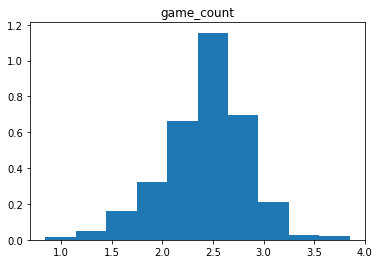

In [ ]:
a = prdf['game_count'].unique() + 1
plt.hist(np.log10(a), density=True)
plt.title('game_count')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Figures/Updated Hist/game_counthist.png')

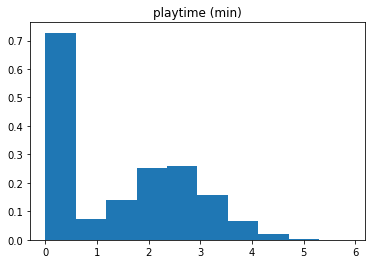

In [ ]:
plt.hist(np.log10(prdf['playtime (min)'] + 1), density=True)
plt.title('playtime (min)')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/playtimehist.png')

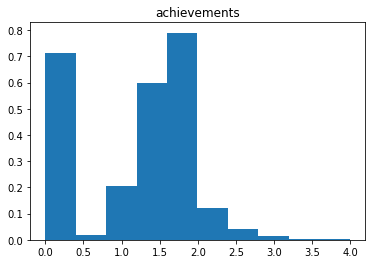

In [ ]:
plt.hist(np.log10(prdf['achievements'] + 1), density=True)
plt.title('achievements')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/achievementshist.png')

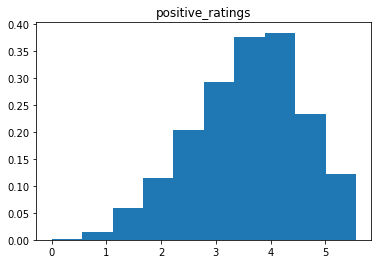

In [ ]:
plt.hist(np.log10(prdf['positive_ratings'] + 1), density=True)
plt.title('positive_ratings')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/posrathist.png')

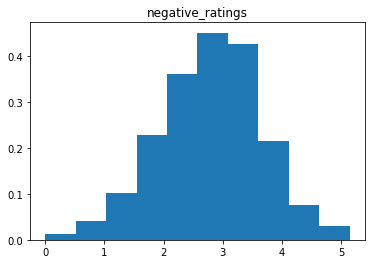

In [ ]:
plt.hist(np.log10(prdf['negative_ratings'] + 1), density=True)
plt.title('negative_ratings')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/negratehist.png')

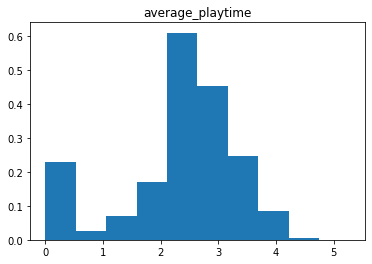

In [ ]:
plt.hist(np.log10(prdf['average_playtime'] + 1), density=True)
plt.title('average_playtime')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/averageplaytimehist.png')

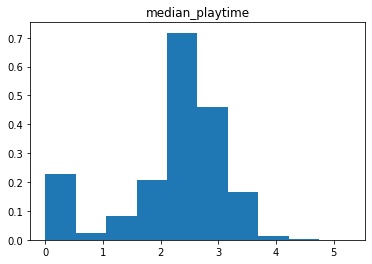

In [ ]:
plt.hist(np.log10(prdf['median_playtime'] + 1), density=True)
plt.title('median_playtime')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/medianplaytimehist.png')

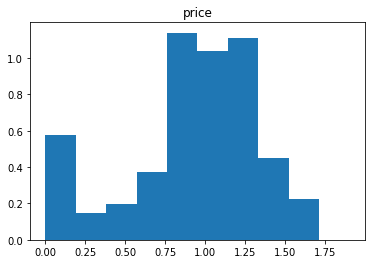

In [ ]:
plt.hist(np.log10(prdf['price'] + 1), density=True)
plt.title('price')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/pricehist.png')

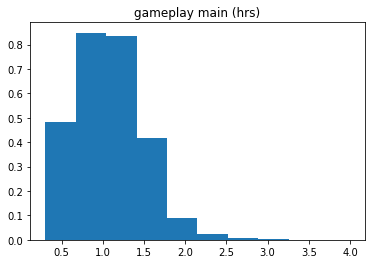

In [ ]:
a = prdf['gameplay main (hrs)'] + 1
a = a[a>1]
plt.hist(np.log10(a), density=True)
plt.title('gameplay main (hrs)')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/gameplaymain.png')

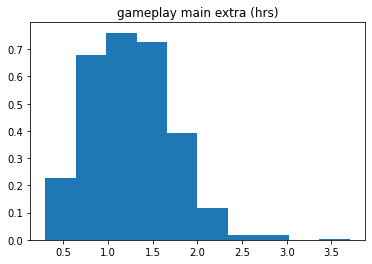

In [ ]:
a = prdf['gameplay main extra (hrs)'] + 1
a = a[a>1]
plt.hist(np.log10(a), density=True)
plt.title('gameplay main extra (hrs)')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/mainextrahist.png')

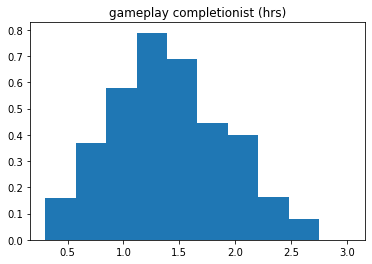

In [ ]:
a = prdf['gameplay completionist (hrs)'] + 1
a = a[a>1]
plt.hist(np.log10(a), density=True)
plt.title('gameplay completionist (hrs)')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/completionisthist.png')

# Cleaning


In [ ]:
#Steam playtime is converted to hours so it matches with the howlongtobeat data

prdf['playtime (hrs)'] = prdf['playtime (min)'] / 60
prdf['average total playtime (hrs)'] = prdf['average_playtime'] / 60
prdf['median total playtime (hrs)'] = prdf['median_playtime'] / 60

prdf = prdf.drop(['playtime (min)'], axis=1)
prdf = prdf.drop(['average_playtime'], axis=1)
prdf = prdf.drop(['median_playtime'], axis=1)

In [ ]:
#if the gameplay time is 0 then there is not a 'story mode' and should not be included, and if its -1 the gameplay time is unknown

prdf = prdf[prdf['gameplay main (hrs)'] > 0]
prdf = prdf[prdf['gameplay main extra (hrs)'] > 0]
prdf = prdf[prdf['gameplay completionist (hrs)'] > 0]

num_games = prdf['appid'].unique().size
print('Number of Games: ' + str(num_games))
print('Number of Rows: ' + str(prdf.shape[0]))

Number of Games: 3214
Number of Rows: 195055


In [ ]:
#some of the datatypes need to be changed

prdf = (
    prdf
    .astype(
        {'release_date': 'datetime64', 
         'english': 'bool',
         'platforms': 'str',
         'categories': 'str',
         'genres': 'str',
         'steamspy_tags': 'str'
        })
)

In [ ]:
#the age of the game impacts its sales so I wanted to add it as a variable called 'days_since_release'
current_time = datetime.datetime.now()
prdf['days_since_release'] = (current_time - prdf['release_date']).dt.days

The owners column was originally contained strings showing a range for how many copies were sold. I converted this to a single number which is the game's sale rank. The dictionary below shows the conversion.

In [ ]:
sales_rank = np.flip(prdf['owners'].unique())
rank_dict = {sales_rank[i]: i+1 for i in range(len(sales_rank))} 

prdf['sales rank'] = prdf['owners'].apply(lambda x: rank_dict[x])
prdf = prdf.drop(columns=['owners'])

In [ ]:
rank_dict

{'0-20000': 1,
 '100000-200000': 4,
 '1000000-2000000': 9,
 '10000000-20000000': 11,
 '20000-50000': 3,
 '200000-500000': 5,
 '2000000-5000000': 8,
 '20000000-50000000': 6,
 '50000-100000': 2,
 '500000-1000000': 7,
 '5000000-10000000': 10}

Note: Its okay to do a strict cutoff at the hourstobeat time for estimation because people who play faster often play the game multiple times (i.e. speedrunning) and this is not included in the website data but is in the Steam data. Add in the fact that some will do 'relaxed' playthroughs and this can be considered noise. While the data is skewed to the right the estimated completion numbers are if anything larger than the actual.

In [ ]:
prdf['completed'] = (prdf['playtime (hrs)'] > prdf['gameplay main (hrs)'])

In [ ]:
#steam typically describes game rating via percent of postive ratings so this was added to the table
prdf['percent_of_positve_ratings'] = (
    prdf['positive_ratings']/(prdf['positive_ratings'] + prdf['negative_ratings'])
)

In [ ]:
#standardized the column names
prdf = (
    prdf
    .rename(columns={
        'gameplay main (hrs)': 'gameplay_main (hrs)',
        'gameplay main extra (hrs)': 'gameplay_main_extra (hrs)',
        'gameplay completionist (hrs)': 'gameplay_completionist (hrs)',
        'average total playtime (hrs)': 'average_total_playtime (hrs)',
        'median total playtime (hrs)': 'median_total_playtime (hrs)',
        'sales rank': 'sales_rank'
        }
    )
)

In [ ]:
prdf.head()

,game_count,userId,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,price,gameplay_main (hrs),gameplay_main_extra (hrs),gameplay_completionist (hrs),playtime (hrs),average_total_playtime (hrs),median_total_playtime (hrs),days_since_release,sales_rank,completed,percent_of_positve_ratings
0,88,76561198156664158,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,4.683333,207.033333,31.25,5022,11,False,0.956773
1,106,76561198043472122,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,168.183333,207.033333,31.25,5022,11,True,0.956773
2,211,76561198048353577,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,1924.200000,207.033333,31.25,5022,11,True,0.956773
3,185,76561198100701221,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,449.316667,207.033333,31.25,5022,11,True,0.956773
4,152,76561198078738103,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,11368.100000,207.033333,31.25,5022,11,True,0.956773


# Exploration

Started by looking at the official genre and categories on Steam for the games.

In [ ]:
genres = prdf['genres'].str.get_dummies(sep=';').columns
genredf = prdf.merge(prdf['genres'].str.get_dummies(sep=';'), how='outer', left_index=True, right_index=True)

genres

Index(['Action', 'Adventure', 'Casual', 'Early Access', 'Free to Play', 'Gore',
       'Indie', 'Massively Multiplayer', 'Nudity', 'RPG', 'Racing',
       'Sexual Content', 'Simulation', 'Sports', 'Strategy', 'Violent'],
      dtype='object')

In [ ]:
genre_stats = {'genre': genres, 'mean time': [], 'median time': [], 'completion (%)': []}

for i in range(len(genres)):
  genre_stats['mean time'].append(genredf[genredf[genres[i]] == 1]['playtime (hrs)'].mean())
  genre_stats['median time'].append(genredf[genredf[genres[i]] == 1]['playtime (hrs)'].median())
  genre_stats['completion (%)'].append(genredf[genredf[genres[i]] == 1]['completed'].mean())

When focusing on the 'completion (%)' most of the genres don't have huge differences in game completion. The biggested outliers are Early Access* and Free to Play. This suggests that 'completion(%)' captrures a mix of game enjoyment and investment. Early Access games will have updates that people are invested in, so players are more likely to keep up with with game (as there is typically an online community) and finish it espcially if its short. Free to Play games are often downloaded because of the price rather than actual interest, so there is less drive to play and finish the game.

Games that contain violence, gore, nudity, and/or sexual content also showed lower completion rates suggesting a possible correlation between player age/game rating and completion.

*The completion time for Early access will change over time however the howlongtobeat times and player playtimes were taken at the same time so this correlation is not due to the game being updated

In [ ]:
pd.DataFrame(genre_stats).sort_values('completion (%)', ascending=False)

,genre,mean time,median time,completion (%)
3,Early Access,25.197989,5.800000,0.367980
12,Simulation,38.865382,2.266667,0.239653
7,Massively Multiplayer,66.901437,6.483333,0.219741
0,Action,17.044732,0.733333,0.212010
9,RPG,27.025190,1.466667,0.211103
2,Casual,7.504490,0.300000,0.193293
14,Strategy,19.336055,0.750000,0.191170
6,Indie,16.215413,0.583333,0.190906
1,Adventure,14.481744,0.516667,0.186582
13,Sports,10.347664,0.600000,0.183354


In [ ]:
categories = prdf['categories'].str.get_dummies(sep=';').columns
categoriedf = prdf.merge(prdf['categories'].str.get_dummies(sep=';'), how='outer', left_index=True, right_index=True)
categories

Index(['Captions available', 'Co-op', 'Commentary available',
       'Cross-Platform Multiplayer', 'Full controller support',
       'In-App Purchases', 'Includes Source SDK', 'Includes level editor',
       'Local Co-op', 'Local Multi-Player', 'MMO', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'Partial Controller Support',
       'Shared/Split Screen', 'Single-player', 'Stats', 'Steam Achievements',
       'Steam Cloud', 'Steam Leaderboards', 'Steam Trading Cards',
       'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles',
       'VR Support', 'Valve Anti-Cheat enabled'],
      dtype='object')

In [ ]:
category_stats = {'category': categories, 'mean time': [], 'median time': [], 'completion (%)': []}

for i in range(len(categories)):
  category_stats['mean time'].append(categoriedf[categoriedf[categories[i]] == 1]['playtime (hrs)'].mean())
  category_stats['median time'].append(categoriedf[categoriedf[categories[i]] == 1]['playtime (hrs)'].median())
  category_stats['completion (%)'].append(categoriedf[categoriedf[categories[i]] == 1]['completed'].mean())

For categories the two main outliers were 'Includes Source SDK' and 'Steam Turn Notifications'. 'Includes Source SDK' is an extremely rare category nearly only used by Valve, the company that created Steam and that has made very popular games. These games are highly rated and old which means players may have had more desire and time to complete these games. 'Steam Turn Notifications' is a feature that allows players of boardgame style games to close the game and be notified when its their turn. Since playtime tracks the time the game is open these will inherently limit the growth of this statistic. Also howlongtobeat.com may include this skipped time in its calculations.

Suprsingly multiplayer games had less of an effect on playtime than expected. While generally there was a postive correlation it was nothing as drastic as initially anticipated. However, as expected games with mods lead to higher playtimes.

In [ ]:
pd.DataFrame(category_stats).sort_values('completion (%)', ascending=False)

,category,mean time,median time,completion (%)
6,Includes Source SDK,22.152431,2.633333,0.357143
24,SteamVR Collectibles,3.617370,1.266667,0.311499
23,Steam Workshop,47.613925,4.366667,0.306133
2,Commentary available,16.789300,0.966667,0.299489
26,Valve Anti-Cheat enabled,66.926918,3.866667,0.290650
1,Co-op,42.932965,3.616667,0.287362
12,Online Co-op,47.179770,4.233333,0.280222
7,Includes level editor,43.940256,2.966667,0.279386
0,Captions available,46.600379,1.850000,0.276953
13,Online Multi-Player,40.514244,3.500000,0.274818


In [ ]:
# All games listed except 'The Forgotten Ones' were created by Valve
categoriedf[categoriedf['Includes Source SDK'] == 1]['name'].unique()

array(['Portal', 'Half-Life 2', 'Half-Life 2: Episode One',
       'Half-Life 2: Episode Two', 'Left 4 Dead 2', 'Left 4 Dead',
       'Black Mesa', 'The Forgotten Ones'], dtype=object)

It seems that more players start multiplayer games compared to singleplayer ones, so it may be that having others to play with motivates players.

In [ ]:
num_unplayed = lambda x: (x[x == 0].size)/(x.size)
m_unplayed = categoriedf[categoriedf['Multi-player'] == 1].groupby('name').agg({'playtime (hrs)': num_unplayed}).mean()[0]
s_unplayed = categoriedf[categoriedf['Multi-player'] == 0].groupby('name').agg({'playtime (hrs)': num_unplayed}).mean()[0]
all_unplayed = categoriedf.groupby('name').agg({'playtime (hrs)': num_unplayed}).mean()[0]

# Average proportion of players that never start
print('Multi-player:' +  str(m_unplayed))
print('Single-player:' +  str(s_unplayed))
print('All types:' +  str(all_unplayed))

Multi-player:0.4377528321062527
Single-player:0.5214661864559013
All types:0.5093155084021761


From the correlations it seems that the biggestes factors are popularity and perceived quality (based on ratings). More specfic factors of game completion can be seen in how they affect sales rank and ratings.

In [ ]:
full_prdf = genredf.merge(categoriedf.iloc[:, 26:53], left_index=True, right_index=True)
full_prdf = full_prdf.drop(columns=['percent_of_positve_ratings_y'])
full_prdf = full_prdf.rename(columns={'percent_of_positve_ratings_x': 'percent_of_positve_ratings'})

full_prdf.corr()[16:19]#['completed'].abs().sort_values()

,game_count,userId,appid,english,required_age,achievements,positive_ratings,negative_ratings,price,gameplay_main (hrs),gameplay_main_extra (hrs),gameplay_completionist (hrs),playtime (hrs),average_total_playtime (hrs),median_total_playtime (hrs),days_since_release,sales_rank,completed,percent_of_positve_ratings,Action,Adventure,Casual,Early Access,Free to Play,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,MMO,Multi-player,Online Co-op,Online Multi-Player,Partial Controller Support,Shared/Split Screen,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support
sales_rank,-0.289494,0.115095,-0.474992,0.014429,0.202710,0.078308,0.455321,0.268946,0.109501,0.287958,0.336531,0.310318,0.133454,0.330733,0.169030,0.397014,1.000000,0.170466,0.263122,0.196313,-0.145261,-0.224891,0.008110,0.063573,-0.029694,-0.285002,0.123862,-0.045670,0.045312,-0.021927,-0.053468,0.068031,-0.020131,-0.006218,-0.042981,0.215003,0.277150,0.264318,0.144238,0.023017,0.041124,0.264455,0.169272,-0.046823,-0.023860,0.129810,0.264450,0.051831,0.081178,0.071592,-0.053799,NaN,0.070135,-0.027413,0.047489,-0.091972,-0.039648,-0.037845,0.228201,-0.048006,-0.017445
completed,-0.098960,0.073529,-0.019264,0.003581,0.097074,0.079698,0.221450,0.153817,0.078207,0.015343,0.085109,0.105300,0.266847,0.177728,0.135222,-0.030429,0.170466,1.000000,0.117973,0.036969,-0.026194,-0.006294,0.051263,-0.038325,-0.012990,-0.023537,0.005298,-0.011468,0.014667,-0.017459,-0.010941,0.044180,-0.005393,-0.011221,-0.014881,0.065088,0.117823,0.057127,0.039415,0.048604,0.007834,0.071730,0.079733,-0.004381,0.011983,0.001864,0.057791,0.051809,0.058300,0.037156,0.012894,NaN,0.050216,0.100692,0.055823,-0.008095,0.067143,-0.010088,0.124978,0.016559,-0.004212
percent_of_positve_ratings,-0.128416,0.062332,-0.084573,0.012768,-0.057330,0.040810,0.217030,-0.147436,-0.134721,0.037519,0.049599,0.079468,0.039400,0.078399,0.020746,0.110653,0.263122,0.117973,1.000000,0.000322,-0.016579,0.022397,0.029725,0.040688,-0.091329,0.113159,-0.071008,-0.068835,-0.042347,-0.024833,-0.038280,0.063220,-0.022786,-0.056424,-0.121538,0.172717,0.083572,0.159442,0.076055,0.032920,0.020146,0.167896,0.142734,0.031115,0.013026,-0.052833,-0.025348,-0.014490,-0.009145,0.018682,0.034180,NaN,0.077953,0.089501,0.123527,0.008454,0.117725,-0.013366,0.155775,0.015423,-0.017561


After looking at how the variables influenced sales_rank, percent_of_positve_ratings, and completed I saw large differences in correlation between seemingly similar columns. For example, earlier I saw that many mature genre games had lower completion rates. However here I saw that mature games were correlated with higher completion proportions and sales. The splits I'm seeing indicate another important factor. 

As I have yet to look into publisher and this can have a large affect on game quality, length, and perception I will lok at the differences between Indie and AAA titles.

In [ ]:
indie_prdf = full_prdf[full_prdf['Indie'] == 1]
aaa_prdf = full_prdf[full_prdf['Indie'] == 0]

numi = indie_prdf['name'].unique().size
numAAA = aaa_prdf['name'].unique().size

print('Number of Indie Games: ' + str(numi))
print('Number of AAA Games: ' + str(numAAA))

Number of Indie Games: 2083
Number of AAA Games: 1130


This split seems to explain inconsistences with factors like genre, price, and sales rank. Users on Steam are generally aware about this distinction and know that Indie games typically have lower budgets, teams, and advertising. They also are far more plentiful on Steam as its one of the easiest places to sell Indie games. Its possible that this factor influences player expection and that Indie games and AAA games have different advantages over the other.

In [ ]:
indie_prdf.corr()[16:19]

,game_count,userId,appid,english,required_age,achievements,positive_ratings,negative_ratings,price,gameplay_main (hrs),gameplay_main_extra (hrs),gameplay_completionist (hrs),playtime (hrs),average_total_playtime (hrs),median_total_playtime (hrs),days_since_release,sales_rank,completed,percent_of_positve_ratings,Action,Adventure,Casual,Early Access,Free to Play,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,MMO,Multi-player,Online Co-op,Online Multi-Player,Partial Controller Support,Shared/Split Screen,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support
sales_rank,-0.278345,0.121315,-0.424726,0.017265,0.023313,0.017896,0.451635,0.326022,0.136026,0.410242,0.446588,0.419329,0.159094,0.418143,0.136161,0.308026,1.000000,0.153683,0.318582,0.101119,-0.062794,-0.117411,0.064760,0.166123,0.015761,NaN,0.216810,-0.020871,0.093619,-0.046983,-0.044867,0.214241,-0.012801,0.063887,-0.010894,0.109728,0.417193,-0.015072,0.298322,0.040575,0.092210,0.047086,0.240895,0.006193,0.056020,0.212521,0.384155,0.166024,0.240106,0.005919,0.049220,NaN,-0.056415,-0.053352,0.085255,-0.098378,0.073298,-0.033708,0.293041,-0.053311,0.022255
completed,-0.083630,0.084111,-0.039544,0.004854,0.037514,0.020904,0.123213,0.057896,0.027518,0.016442,0.061027,0.084400,0.229716,0.104210,0.064178,0.015161,0.153683,1.000000,0.129740,0.012450,-0.054947,0.015948,0.079039,-0.048475,-0.003916,NaN,0.009892,-0.007769,0.010062,0.024305,-0.011273,0.088516,0.024921,0.010366,-0.007431,-0.006809,0.084298,-0.032543,0.060773,-0.027995,-0.000124,0.002070,0.069690,-0.029557,-0.005526,0.005906,0.081205,0.056885,0.088631,0.015767,0.028759,NaN,0.020624,-0.008464,0.018751,-0.004727,0.027458,-0.011013,0.091915,0.036600,0.001456
percent_of_positve_ratings,-0.164290,0.073654,-0.029289,0.020653,0.007518,0.034383,0.240259,-0.039195,-0.009124,0.076982,0.104361,0.122310,0.067171,0.130925,0.076756,0.037522,0.318582,0.129740,1.000000,-0.047890,-0.063683,-0.000161,0.044696,0.033820,-0.056198,NaN,-0.078273,-0.045058,-0.025747,0.016749,-0.009497,0.120255,0.008806,-0.048991,-0.104249,0.047353,0.074891,0.016782,0.090839,0.025792,0.051415,0.005201,0.107856,0.016866,-0.003900,-0.069913,0.061649,0.010742,0.042716,-0.006506,0.044299,NaN,-0.013369,0.057082,0.115953,0.007375,0.072451,-0.012438,0.165054,0.008144,-0.027285


In [ ]:
aaa_prdf.corr()[16:19]

,game_count,userId,appid,english,required_age,achievements,positive_ratings,negative_ratings,price,gameplay_main (hrs),gameplay_main_extra (hrs),gameplay_completionist (hrs),playtime (hrs),average_total_playtime (hrs),median_total_playtime (hrs),days_since_release,sales_rank,completed,percent_of_positve_ratings,Action,Adventure,Casual,Early Access,Free to Play,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,MMO,Multi-player,Online Co-op,Online Multi-Player,Partial Controller Support,Shared/Split Screen,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support
sales_rank,-0.285512,0.118892,-0.421427,NaN,0.165837,0.131938,0.493497,0.253162,-0.033379,0.098665,0.171270,0.155810,0.103157,0.239566,0.179830,0.360272,1.000000,0.191233,0.306893,0.236860,-0.120197,-0.309192,-0.050691,-0.018174,-0.078533,NaN,0.009427,-0.054120,-0.006579,-0.035104,-0.036370,-0.014988,-0.030012,-0.077890,-0.082477,0.335371,0.129602,0.380387,0.002510,0.050287,-0.006034,0.341550,0.176459,-0.048315,-0.105969,0.030544,0.076490,-0.056703,-0.080567,0.108788,-0.111354,NaN,0.201041,0.094720,0.032233,-0.061836,-0.015967,-0.040898,0.210551,-0.053171,-0.025529
completed,-0.115655,0.062697,0.012467,NaN,0.130061,0.167505,0.338282,0.210414,0.112032,0.018976,0.113644,0.124229,0.309160,0.265021,0.243652,-0.082368,0.191233,1.000000,0.114617,0.057159,0.016924,-0.034542,-0.003520,-0.013703,-0.024733,NaN,0.001502,-0.015499,0.019400,-0.050128,-0.008369,-0.005570,-0.036495,-0.032923,-0.022580,0.132427,0.149821,0.095373,0.017541,0.131757,0.019763,0.098367,0.103611,0.066771,0.051179,-0.001557,0.031232,0.052908,0.024737,0.054094,-0.000814,NaN,0.077533,0.202334,0.094938,-0.009521,0.117993,-0.008551,0.166776,-0.001288,-0.009644
percent_of_positve_ratings,-0.113341,0.053151,-0.211486,NaN,-0.026006,0.074298,0.205304,-0.188954,-0.182084,-0.039862,0.006716,0.060131,0.016430,0.028924,-0.026928,0.245099,0.306893,0.114617,1.000000,0.081916,-0.023002,-0.013106,-0.082836,0.013645,-0.157733,NaN,-0.090547,-0.134613,-0.058246,-0.041407,-0.112253,-0.052858,-0.052271,-0.069137,-0.142110,0.286556,0.097927,0.257672,0.029230,0.024861,-0.021678,0.259756,0.164011,0.018976,0.012999,-0.062669,-0.061261,-0.073771,-0.104352,0.052868,-0.027388,NaN,0.162191,0.082754,0.124564,-0.000807,0.112004,-0.019296,0.137314,0.023091,-0.033455


# Tests



# Visualization

In [ ]:
prdf.head()

,game_count,userId,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,price,gameplay_main (hrs),gameplay_main_extra (hrs),gameplay_completionist (hrs),playtime (hrs),average_total_playtime (hrs),median_total_playtime (hrs),days_since_release,sales_rank,completed,percent_of_positve_ratings
0,88,76561198156664158,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,4.683333,207.033333,31.25,5019,11,False,0.956773
1,106,76561198043472122,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,168.183333,207.033333,31.25,5019,11,True,0.956773
2,211,76561198048353577,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,1924.200000,207.033333,31.25,5019,11,True,0.956773
3,185,76561198100701221,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,449.316667,207.033333,31.25,5019,11,True,0.956773
4,152,76561198078738103,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,6.99,132.0,153.0,147.0,11368.100000,207.033333,31.25,5019,11,True,0.956773


Slight correlation between game length and completion.

(0.0, 50.0)

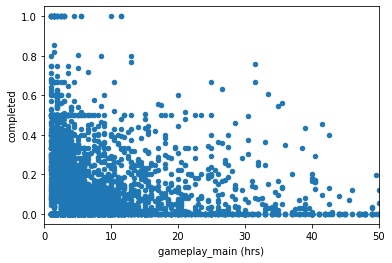

In [ ]:
a = (
    prdf
     .groupby('name')
     .agg(
         {'completed': 'mean',
          'price': 'first',
          'gameplay_main (hrs)': 'first'
         }
     )
)

a.plot.scatter(x=2, y=0)
plt.xlim(0, 50)

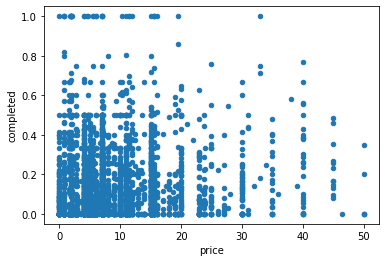

In [ ]:
a.plot.scatter(x=1, y=0)
#plt.xlim(0, 50)